In [53]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

sns.set_theme(style="whitegrid")

In [54]:
# Função para exibir informações sobre o dataset
def info(df):
    # Número de instâncias no dataset
    num_instances = df.shape[0]

    # Número de países diferentes
    num_countries = df["Country"].nunique()
    un_countries = df["Country"].unique()

    # Número de anos diferentes
    num_years = df["Year"].nunique()
    un_years = df["Year"].unique()

    # Número de instâncias por país
    country_counts = df["Country"].value_counts()

    # Número de instâncias por ano por país
    instances_per_year_country = df.groupby(["Country", "Year"]).size().reset_index(name="Instances")

    # Exibição das informações
    print(f"1. Total number of instances (rows) in the dataset: {num_instances}")
    print(f"2. Number of different countries: {num_countries}")
    print(f"\n3. Number of different years: {num_years}")
    print(un_years)
    print(f"\n4. Number of instances for each country:")
    print(country_counts)
    print(f"\n5. Number of instances per year per country:")
    print(instances_per_year_country)


In [55]:
# Download do dataset e carregamento dos dados
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")
print("Path to dataset files:", path)
data_path = f"{path}/Life Expectancy Data.csv"
df = pd.read_csv(data_path)
df.columns = df.columns.str.strip()

# Exibindo as informações
info(df)

Path to dataset files: /home/vitor/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1
1. Total number of instances (rows) in the dataset: 2938
2. Number of different countries: 193

3. Number of different years: 16
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]

4. Number of instances for each country:
Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64

5. Number of instances per year per country:
          Country  Year  Instances
0     Afghanistan  2000          1
1     Afghanistan  2001          1
2     Afghanistan  2002          1
3     Afghanistan  2003          1
4     Afghanistan  2004          1
...           ...   ...       

# PCA

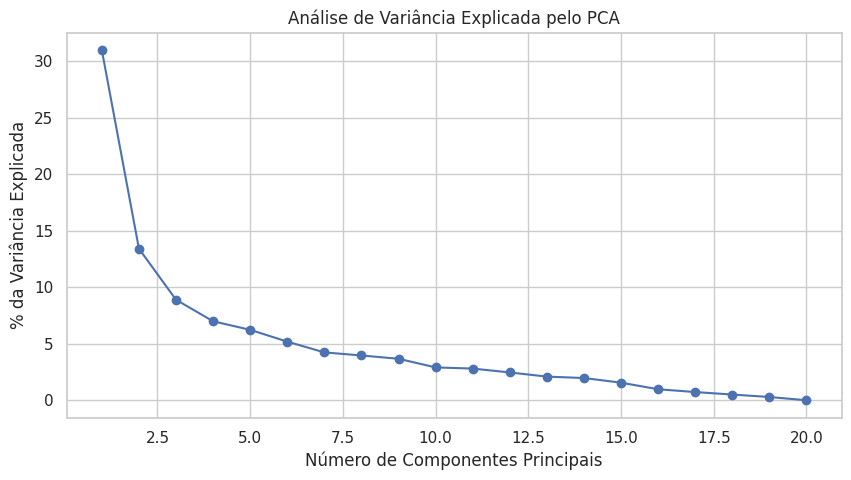

In [56]:
df_pca = df.copy()
numeric_cols = df_pca.select_dtypes(include=['float64', 'int64']).columns
df_pca[numeric_cols] = df_pca[numeric_cols].fillna(df[numeric_cols].mean())

numeric_cols = df_pca.select_dtypes(include='number').columns
df_numeric = df_pca[numeric_cols]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance * 100, marker='o')
plt.xlabel("Número de Componentes Principais")
plt.ylabel("% da Variância Explicada")
plt.title("Análise de Variância Explicada pelo PCA")

df_pca = pca.transform(df_scaled)

In [57]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=numeric_cols)

print("Tabela de Loadings do PCA com Gradiente de Cores:")
styled_loadings = loadings.style.background_gradient(cmap='coolwarm', axis=None)
styled_loadings

Tabela de Loadings do PCA com Gradiente de Cores:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Year,0.077627,0.061051,0.148624,-0.035608,-0.217874,0.811391,0.047452,0.377248,0.041093,0.112136,-0.152305,-0.081845,0.091600,-0.248104,-0.015733,-0.018028,0.022239,-0.036273,0.002722,0.001449
Life expectancy,0.335159,0.184678,0.088090,-0.166768,-0.114775,-0.047374,0.018113,-0.139179,-0.103331,-0.028961,-0.029221,0.021853,-0.003282,0.034740,0.054908,-0.226642,0.844375,-0.016664,-0.021879,-0.026510
Adult Mortality,-0.232967,-0.195860,-0.095865,0.320442,0.213903,0.203152,-0.181017,0.100404,0.158378,0.090161,-0.073302,-0.253645,0.210524,0.671452,0.009952,-0.081226,0.246161,-0.005650,-0.013792,-0.003876
infant deaths,-0.198230,0.484204,-0.013237,-0.033413,0.155019,0.016709,0.028825,0.034299,0.061153,0.003242,0.088221,-0.315588,-0.291516,-0.007812,0.004132,-0.037151,0.024640,0.004523,-0.001138,0.707421
Alcohol,0.216356,0.085506,-0.220274,0.131264,0.372778,-0.060188,-0.095918,-0.135406,-0.279802,0.578623,-0.160401,-0.233560,0.331943,-0.308992,0.014708,0.100434,-0.001928,0.022859,-0.006230,0.010206
percentage expenditure,0.202064,0.167759,-0.366752,0.393459,-0.295391,-0.112399,0.164506,0.080798,0.138901,-0.018766,-0.007568,-0.018703,0.012910,0.003072,0.026134,-0.043135,-0.048568,-0.694802,-0.018665,0.000000
Hepatitis B,0.125699,-0.032361,0.456477,0.260472,0.075259,-0.151151,0.109991,0.334778,0.050521,0.418203,0.556665,0.154119,-0.082300,0.033072,-0.175798,-0.009761,0.058094,-0.030231,0.003567,0.002772
Measles,-0.129189,0.307752,-0.059310,-0.058691,0.189700,-0.207489,-0.017576,0.629083,-0.341060,-0.246350,-0.155942,0.304096,0.325972,0.066158,0.017640,0.019297,0.036026,-0.008191,0.006966,0.003316
BMI,0.271211,0.034724,-0.041030,-0.195056,0.157071,0.059899,-0.092864,-0.014395,0.224410,-0.390609,0.540051,-0.300216,0.497775,-0.080006,0.036519,0.045891,-0.069714,-0.032132,0.013587,0.001102
under-five deaths,-0.204386,0.476068,-0.026140,-0.030380,0.159295,0.013776,0.031255,0.049229,0.054408,0.013710,0.092413,-0.325151,-0.288715,-0.016928,-0.003645,-0.034356,-0.009313,0.011042,-0.011487,-0.705993


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Missing Values

In [59]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

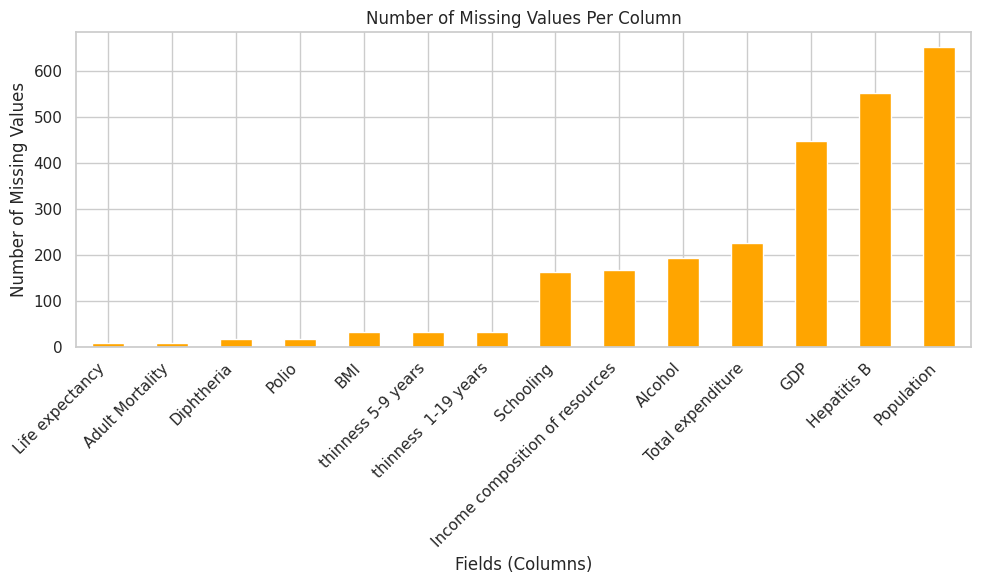

In [60]:
# Gráfico do número de valores ausentes por coluna
plt.figure(figsize=(10, 6))
missing_data = df.isnull().sum().sort_values(ascending=True)
missing_data[missing_data > 0].plot(kind="bar", color="orange")
plt.title("Number of Missing Values Per Column")
plt.xlabel("Fields (Columns)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Missing Values")
plt.tight_layout()

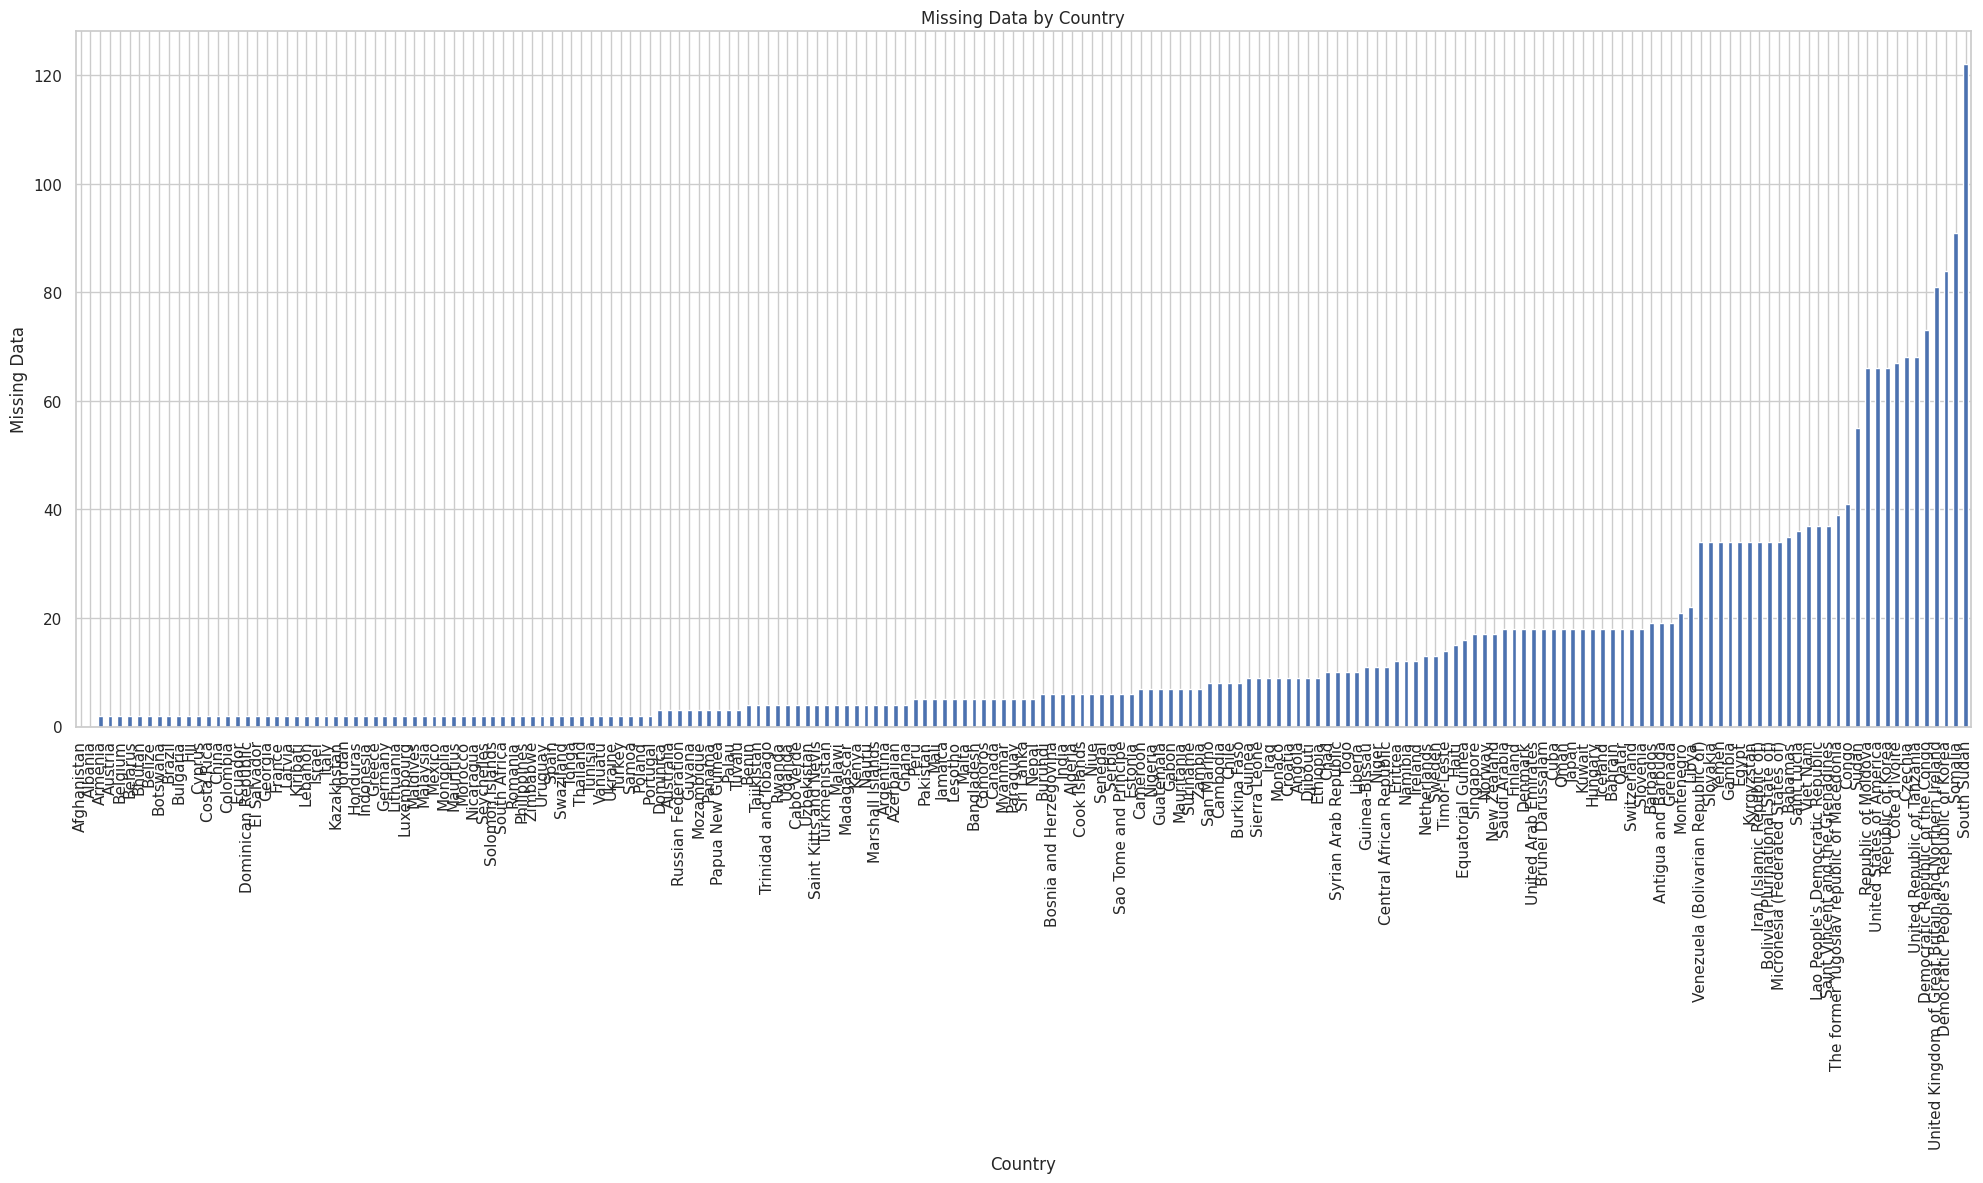

In [61]:
missing_data_per_country = df.isnull().groupby(df["Country"]).sum().sum(axis=1)
missing_data_per_country = missing_data_per_country.sort_values()
plt.figure(figsize=(20, 12))
missing_data_per_country.plot(kind="bar")
plt.title("Missing Data by Country")
plt.xlabel("Country")
plt.ylabel("Missing Data")
plt.tight_layout()

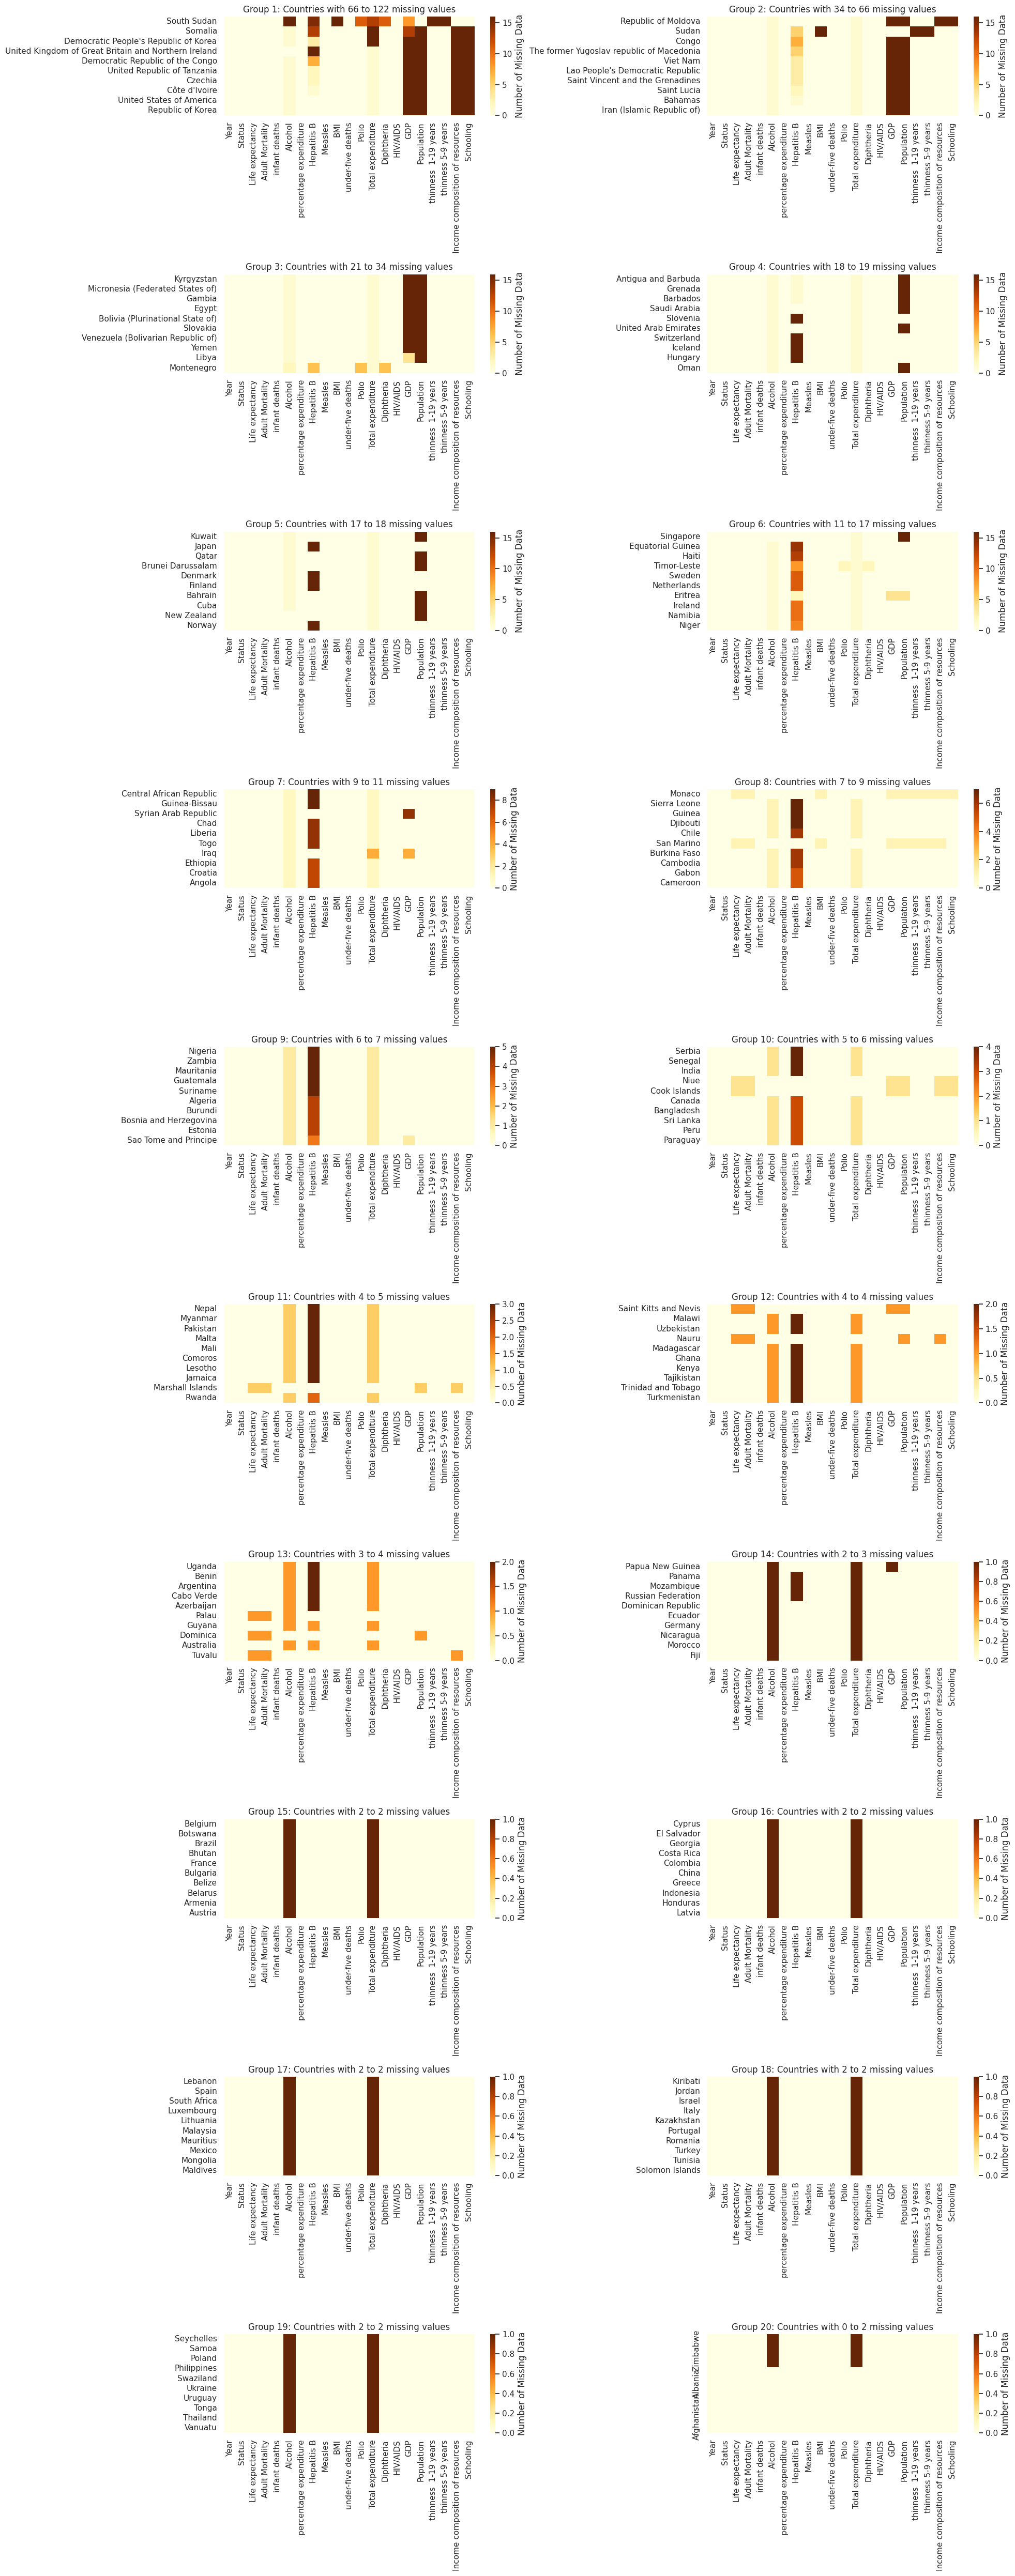

In [62]:
n_countries_per_group=10

missing_data_per_country = df.isnull().groupby(df["Country"]).sum()
missing_data_per_country["total_missing"] = missing_data_per_country.sum(axis=1)
missing_data_per_country = missing_data_per_country.sort_values(by="total_missing", ascending=False)

n_countries = len(missing_data_per_country)
n_groups = int(np.ceil(n_countries / n_countries_per_group))
n_rows = int(np.ceil(n_groups / 2))

# Configurar o layout dos subplots
fig = plt.figure(figsize=(20, 5*n_rows))  # Aumentada a largura para acomodar 2 colunas

for i in range(n_groups):
    # Selecionar os países para o grupo atual
    start_idx = i * n_countries_per_group
    end_idx = min((i + 1) * n_countries_per_group, n_countries)
    group_data = missing_data_per_country.iloc[start_idx:end_idx].drop(columns=["total_missing", "Country"])
    
    
    ax = plt.subplot(n_rows, 2, i+1)
    sns.heatmap(group_data,
                cmap="YlOrBr",
                cbar_kws={"label": "Number of Missing Data"},
                ax=ax)
    
    ax.set_ylabel("")
    total_missing = missing_data_per_country["total_missing"].iloc[start_idx:end_idx]
    title = f"Group {i+1}: Countries with {int(total_missing.min())} to {int(total_missing.max())} missing values"
    ax.set_title(title)

plt.tight_layout()

# Life expectancy

/tmp/ipykernel_19796/813103711.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Life expectancy', ci=None, ax=axes[1,0])
/tmp/ipykernel_19796/813103711.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Life expectancy', hue='Status', ci=None, ax=axes[1,1])


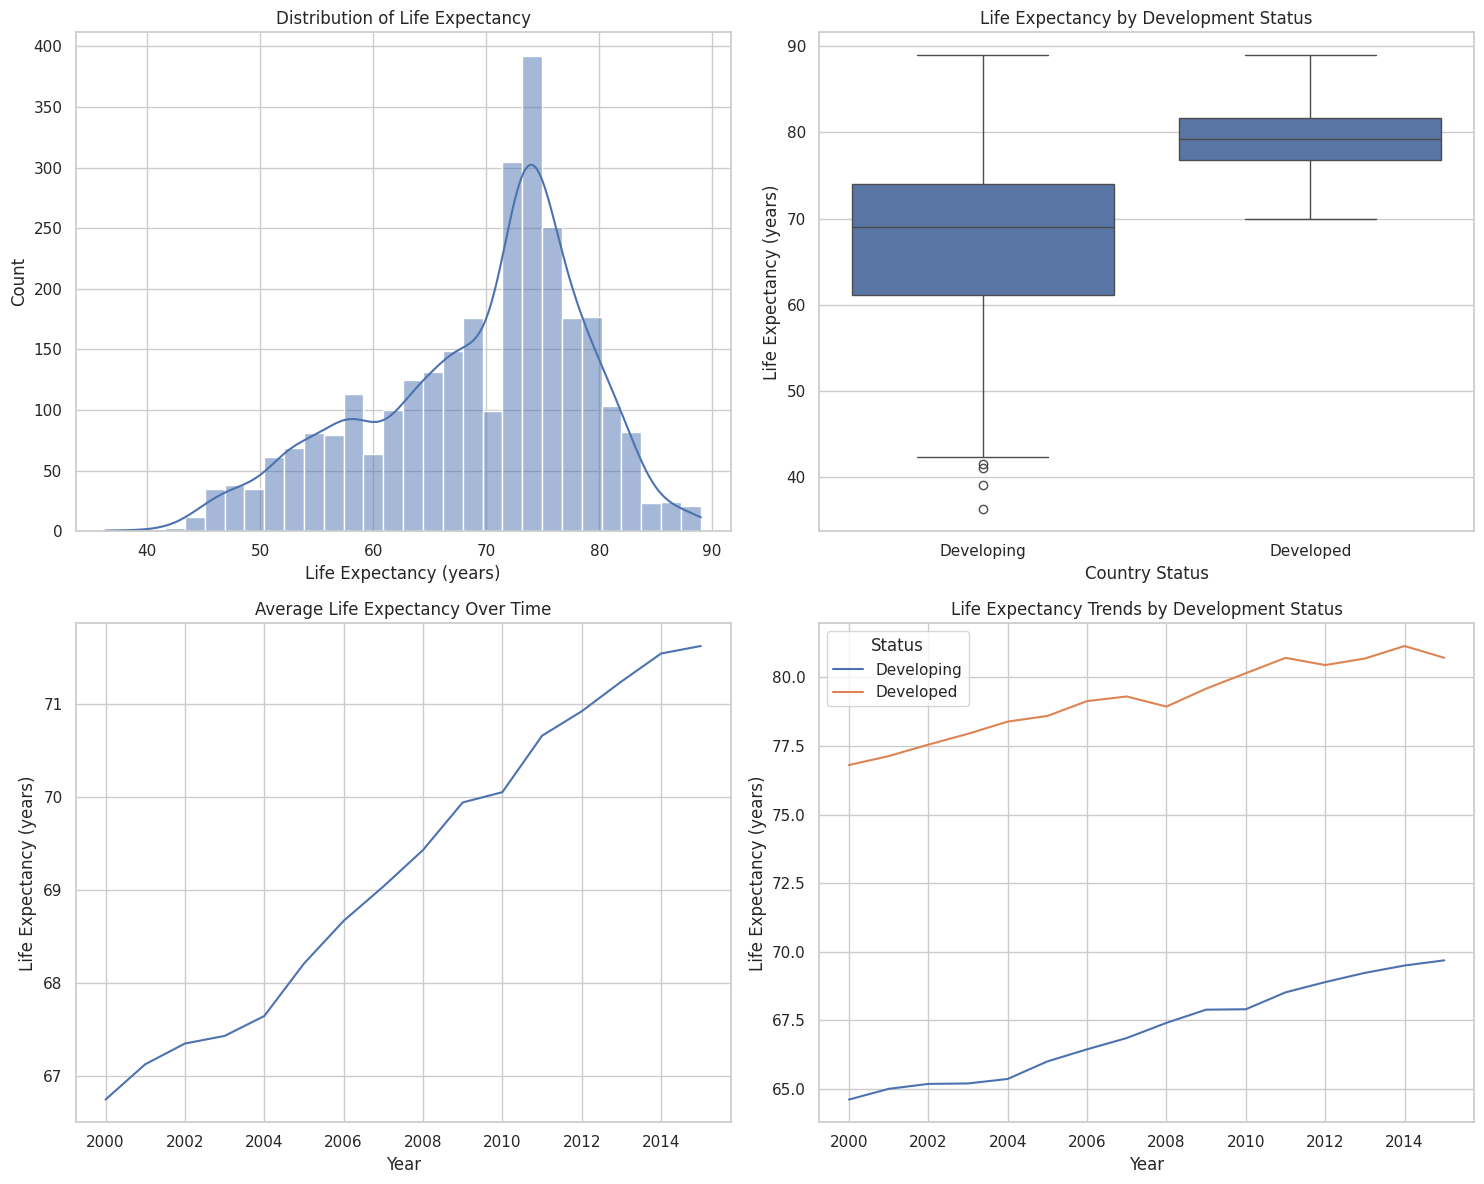

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.histplot(data=df, x='Life expectancy', kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Life Expectancy')
axes[0,0].set_xlabel('Life Expectancy (years)')

sns.boxplot(data=df, x='Status', y='Life expectancy', ax=axes[0,1])
axes[0,1].set_title('Life Expectancy by Development Status')
axes[0,1].set_xlabel('Country Status')
axes[0,1].set_ylabel('Life Expectancy (years)')

sns.lineplot(data=df, x='Year', y='Life expectancy', ci=None, ax=axes[1,0])
axes[1,0].set_title('Average Life Expectancy Over Time')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Life Expectancy (years)')

sns.lineplot(data=df, x='Year', y='Life expectancy', hue='Status', ci=None, ax=axes[1,1])
axes[1,1].set_title('Life Expectancy Trends by Development Status')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Life Expectancy (years)')

plt.tight_layout()

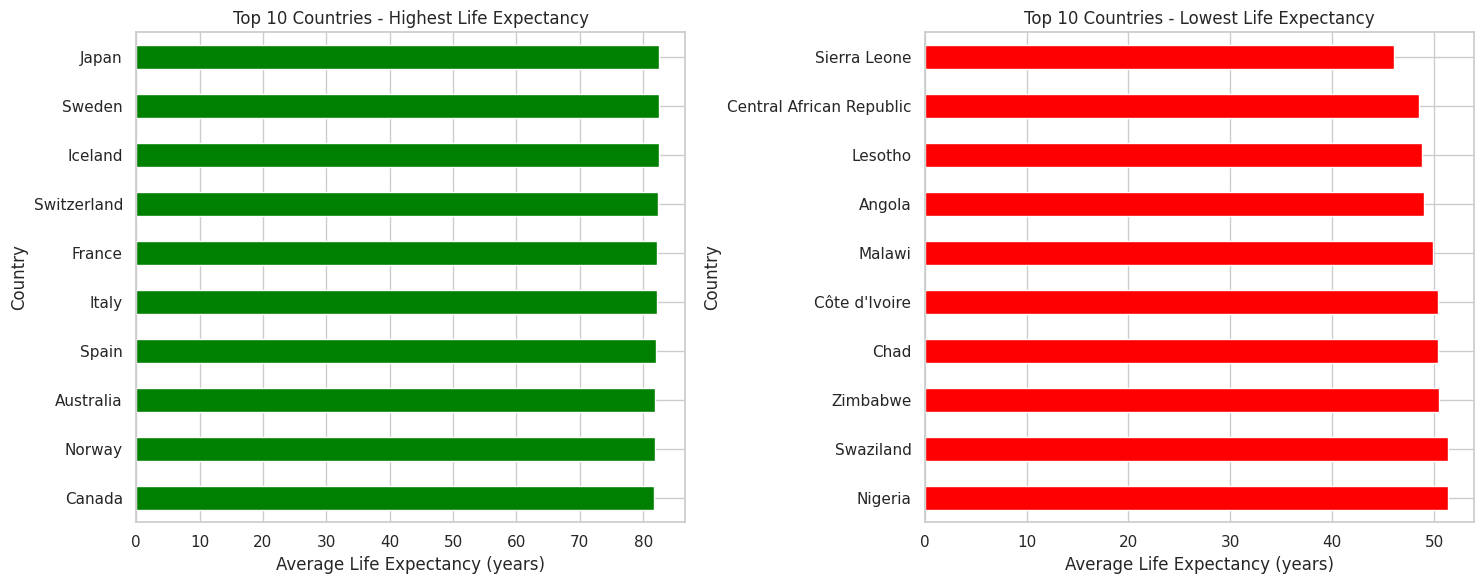

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

top_10 = df.groupby('Country')['Life expectancy'].mean().nlargest(10).sort_values(ascending=True)
top_10.plot(kind='barh', ax=ax1, color='green')
ax1.set_title('Top 10 Countries - Highest Life Expectancy')
ax1.set_xlabel('Average Life Expectancy (years)')

bottom_10 = df.groupby('Country')['Life expectancy'].mean().nsmallest(10).sort_values(ascending=False)
bottom_10.plot(kind='barh', ax=ax2, color='red')
ax2.set_title('Top 10 Countries - Lowest Life Expectancy')
ax2.set_xlabel('Average Life Expectancy (years)')

plt.tight_layout()

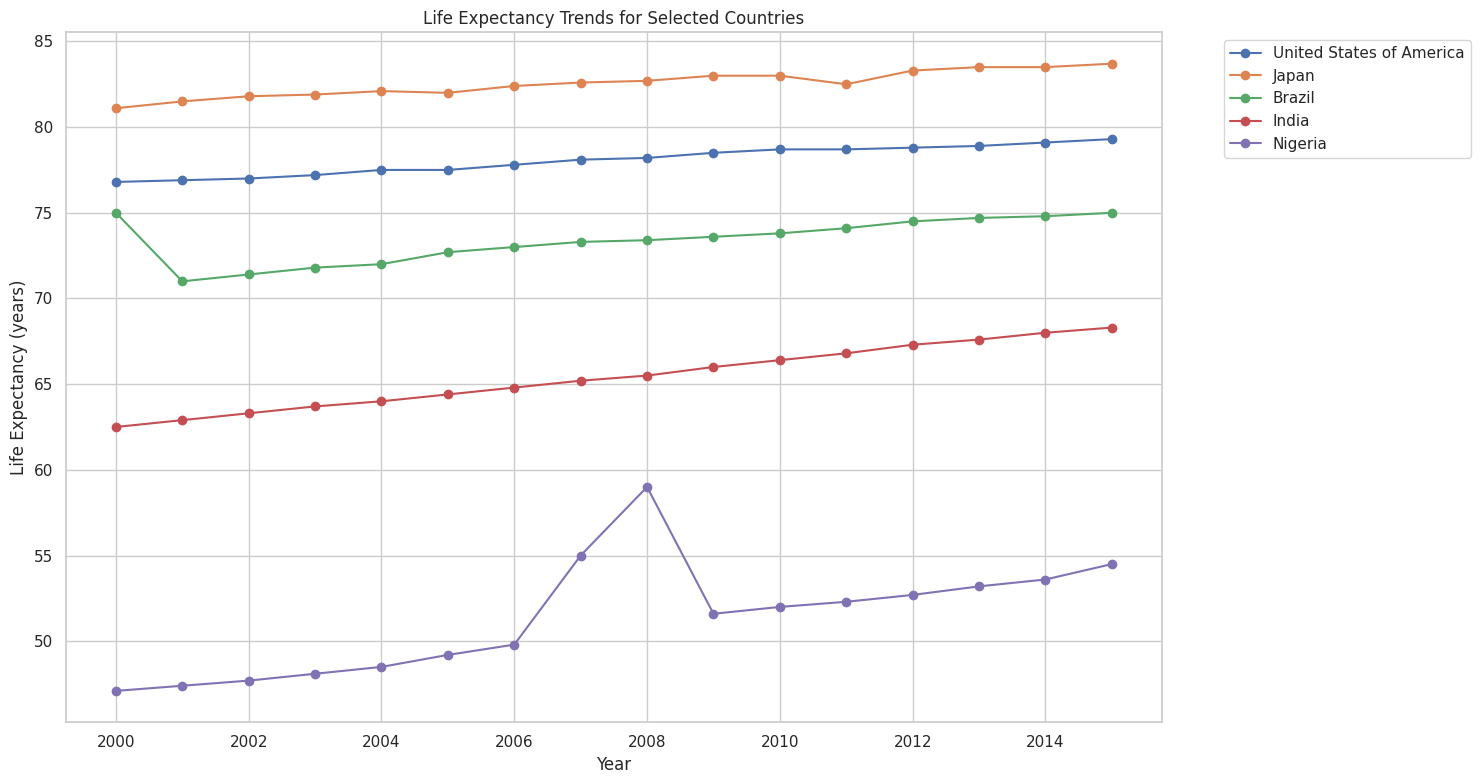

In [65]:
country_list = ['United States of America', 'Japan', 'Brazil', 'India', 'Nigeria']

plt.figure(figsize=(15, 8))
for country in country_list:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy'], marker='o', label=country)

plt.title('Life Expectancy Trends for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Variables

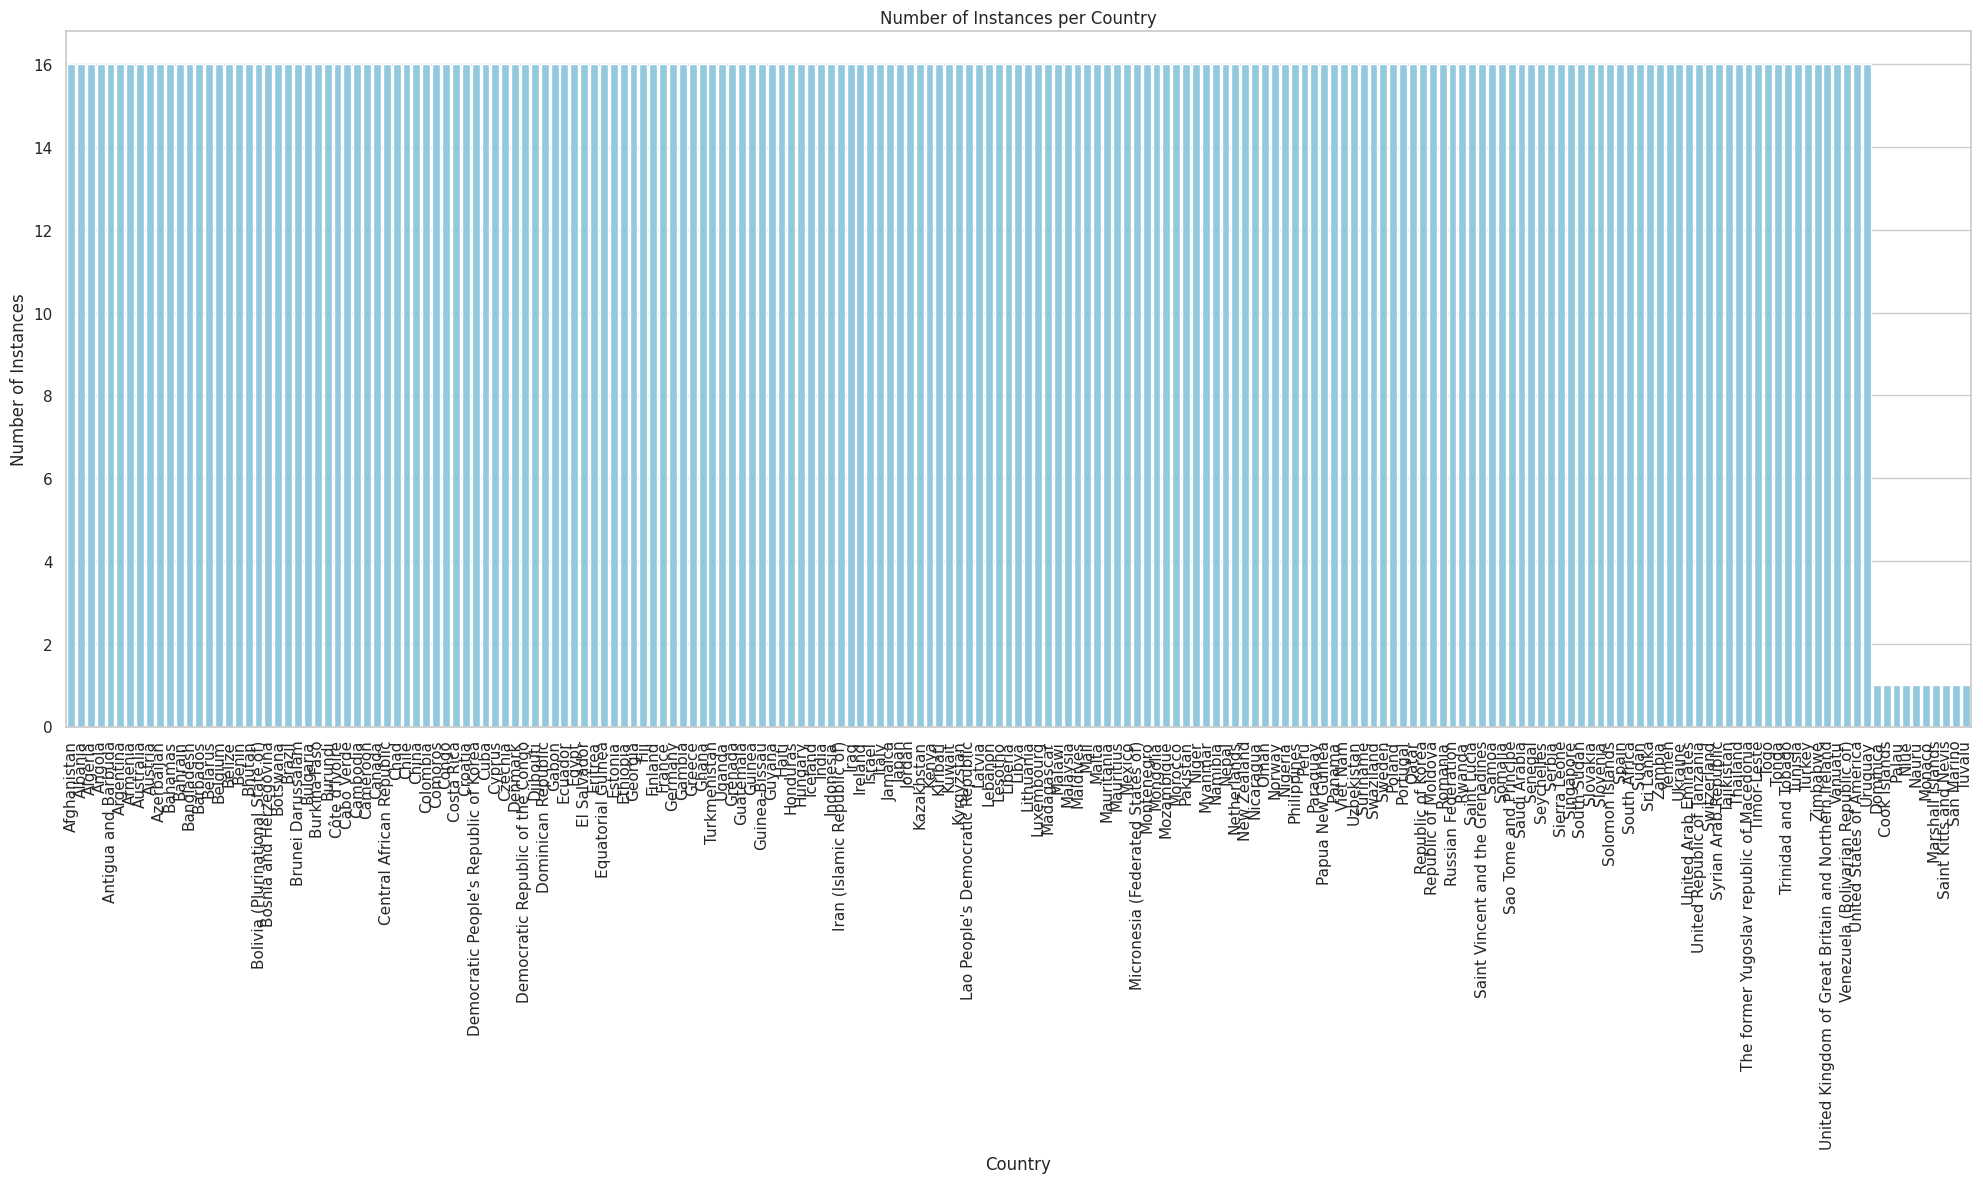

In [66]:
country_counts = df["Country"].value_counts()
plt.figure(figsize=(20, 12))
sns.barplot(x=country_counts.index, y=country_counts.values, color="skyblue")
plt.title("Number of Instances per Country")
plt.xlabel("Country")
plt.ylabel("Number of Instances")
plt.xticks(rotation=90)
plt.tight_layout()

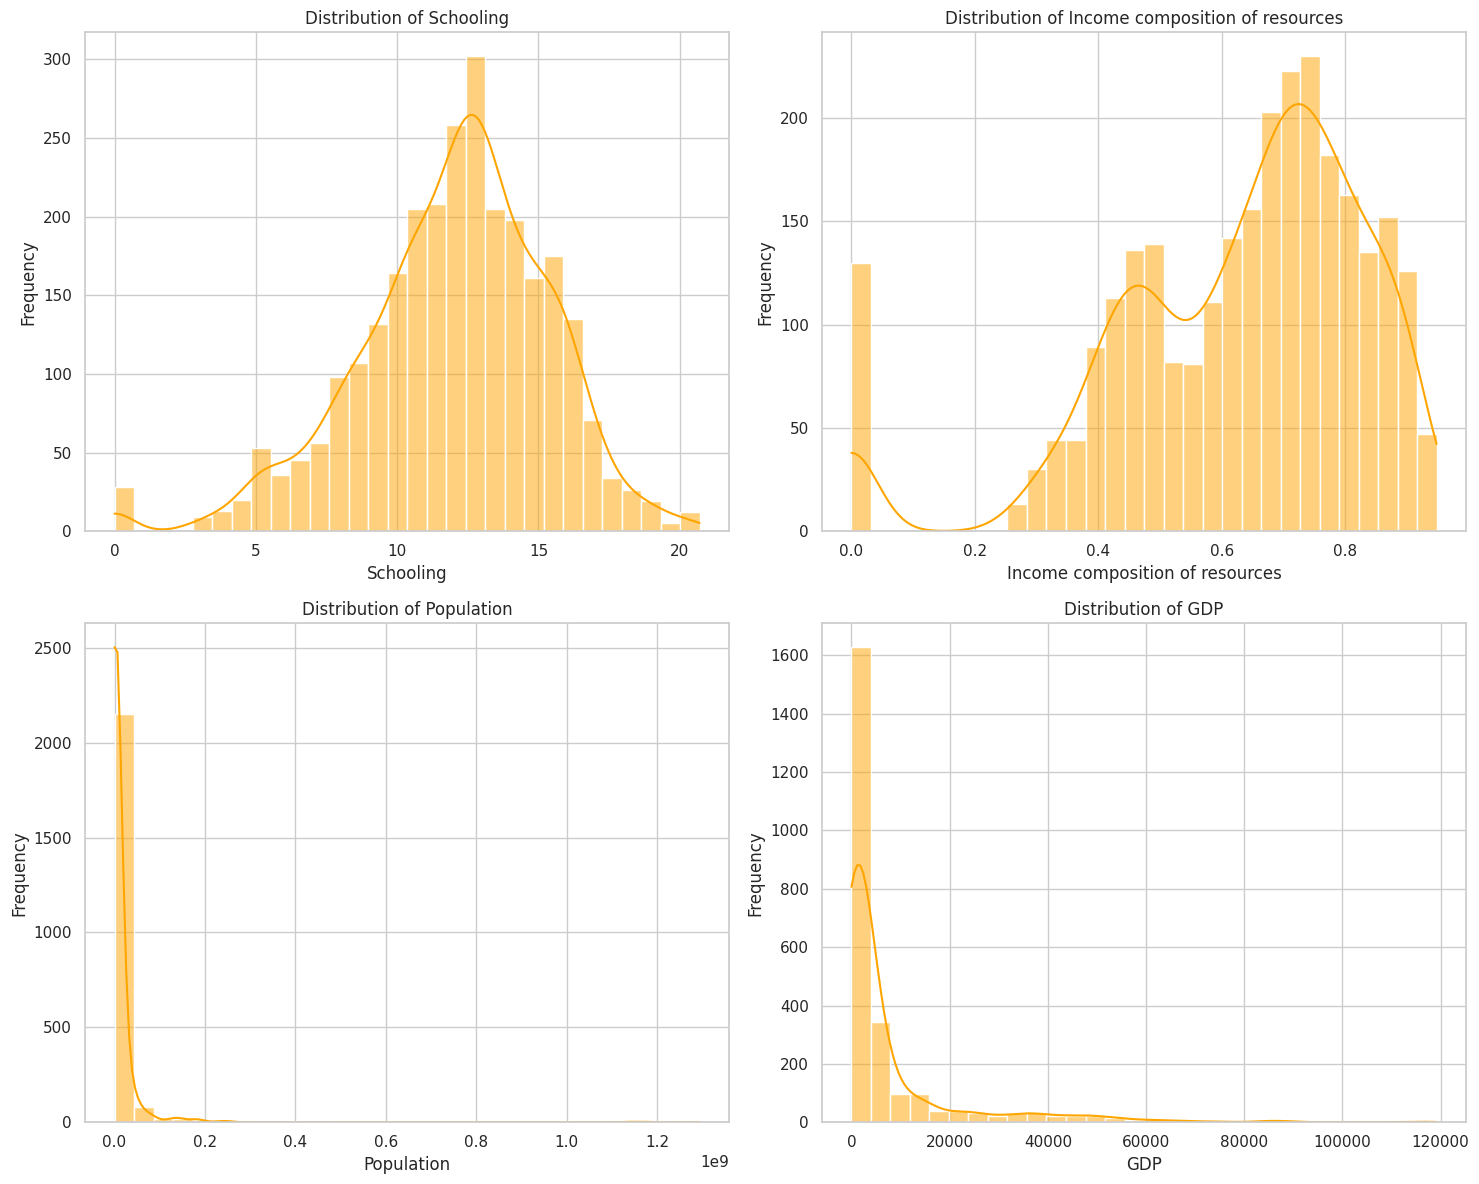

In [67]:
columns = ['Schooling', 'Income composition of resources', 'Population', 'GDP']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.ravel()

for idx, column in enumerate(columns):
    sns.histplot(data=df, kde=True, bins=30, color="orange", x=column, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(f'{column}')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()

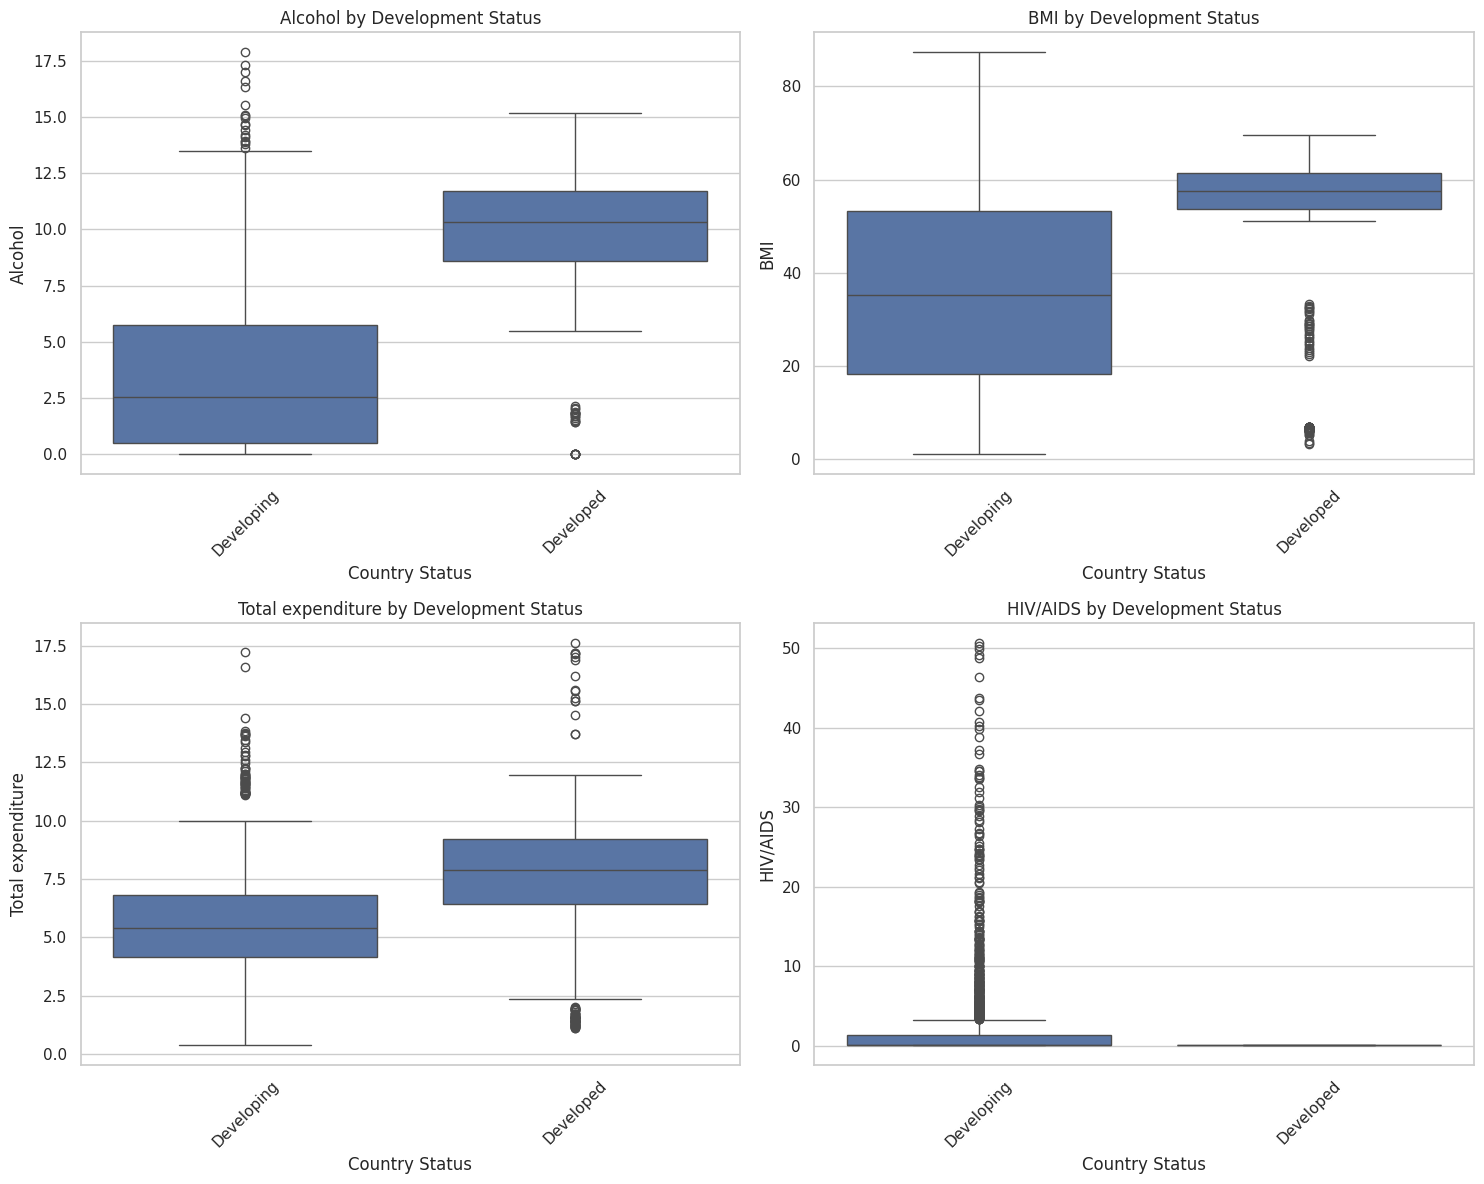

In [68]:
health_indicators = ['Alcohol', 'BMI', 'Total expenditure', 'HIV/AIDS']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.ravel()

for idx, indicator in enumerate(health_indicators):
    sns.boxplot(data=df, x='Status', y=indicator, ax=axes[idx])
    axes[idx].set_title(f'{indicator} by Development Status')
    axes[idx].set_xlabel('Country Status')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()

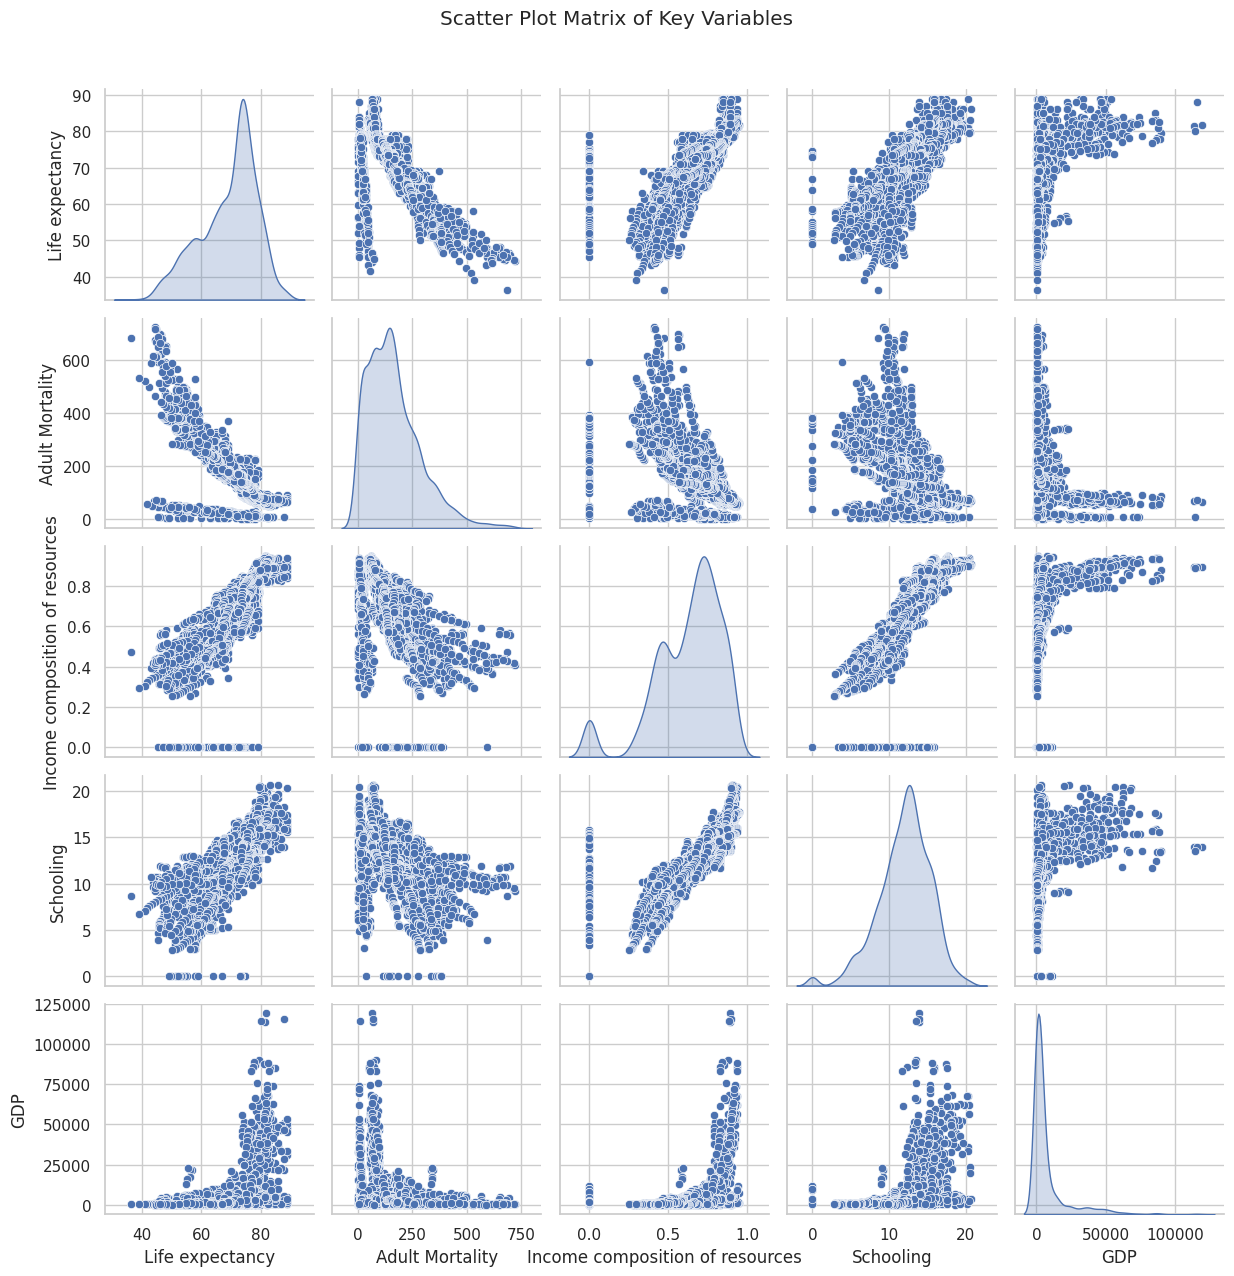

In [69]:
key_vars = ['Life expectancy', 'Adult Mortality', 'Income composition of resources', 'Schooling', 'GDP']
sns.pairplot(df[key_vars], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix of Key Variables', y=1.02)
plt.tight_layout()

<Axes: >

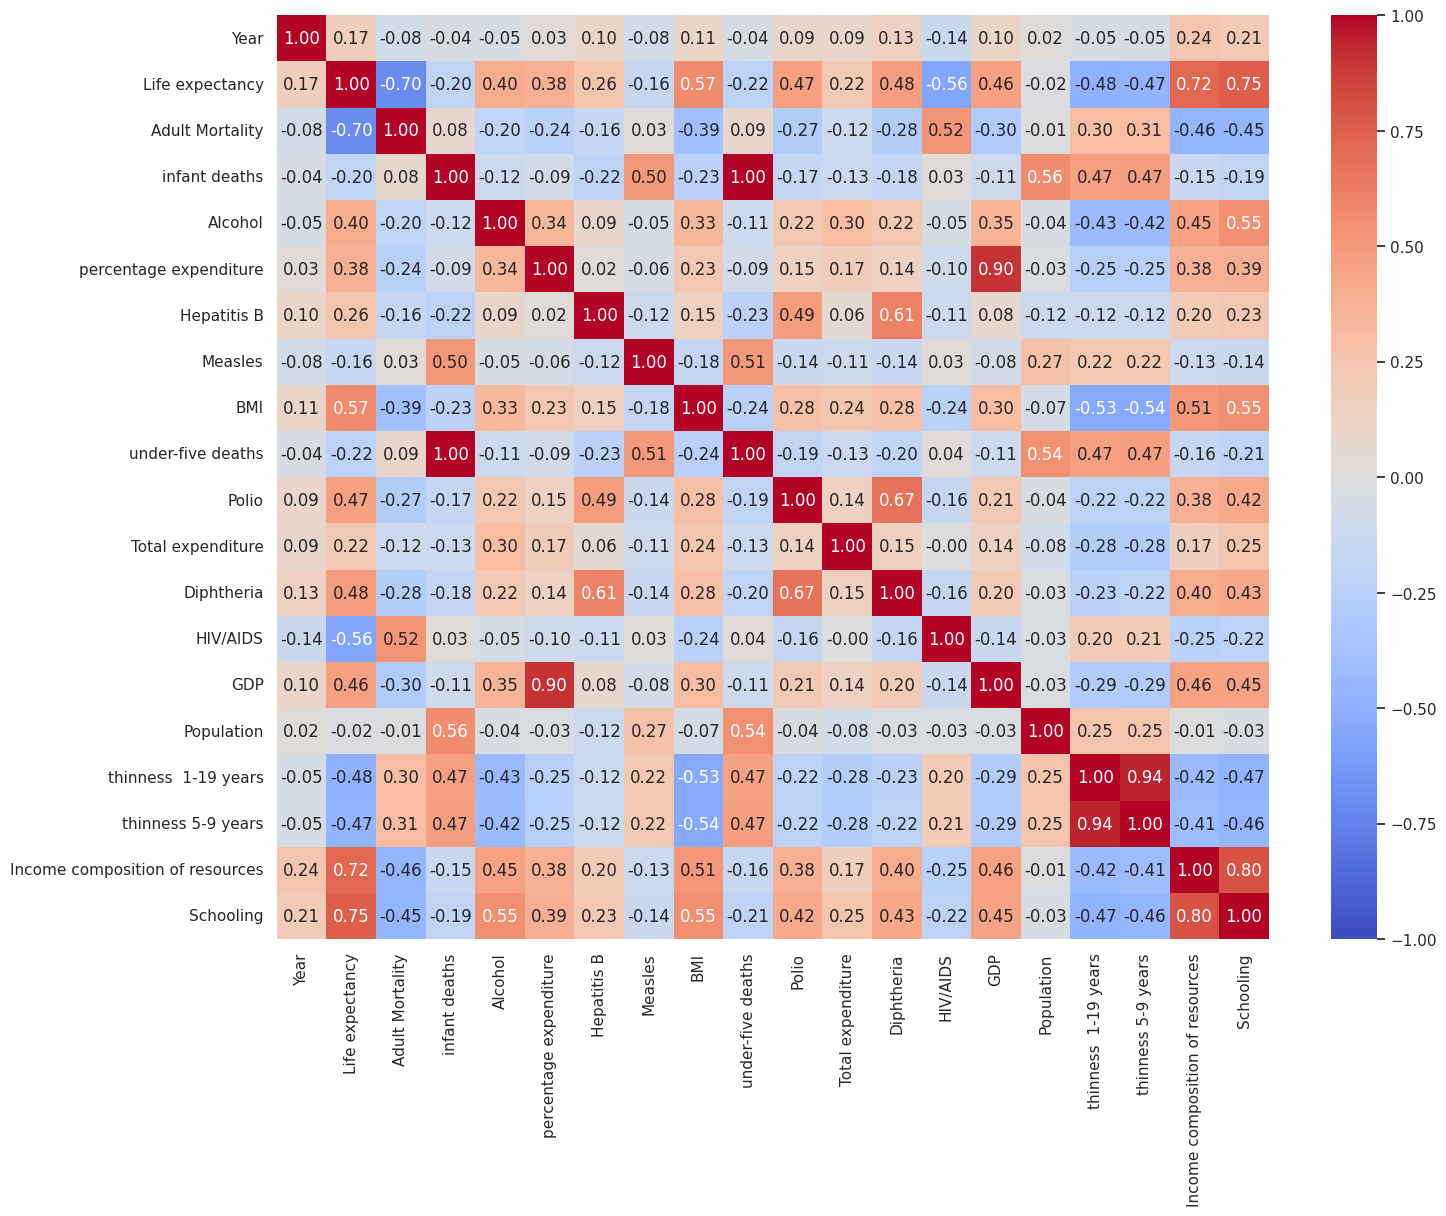

In [70]:
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)